In [1]:
%cd ..

/Users/juansegundohevia/Documents/repos/TexTract


In [75]:
import pix2tex.cli as cli
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
from pix2tex.dataset.dataset import Im2LatexDataset
import yaml
from munch import Munch
import metrics as perf_evaluation
from pix2tex import multiline_utils

In [167]:
import importlib
importlib.reload(perf_evaluation)
importlib.reload(multiline_utils)

<module 'pix2tex.multiline_utils' from '/Users/juansegundohevia/Documents/repos/TexTract/pix2tex/multiline_utils.py'>

In [168]:
ml_model, ml_dataset_test, args = perf_evaluation.get_model_and_data(
    config_path="pix2tex/model/settings/multiline_training_drive.yaml",
    checkpoint_path="pix2tex/model/checkpoints/weights.pth",
    data_path="pix2tex/dataset/multiline/test_resized.pkl",
    temperature=.9, batch_size=1, device="cpu")

## Get candidate sizes

In [103]:
import pickle as pkl
# load original train dataset
with open("pix2tex/dataset/formulae/train.pkl", "rb") as f:
    original_train = pkl.load(f)
candidate_sizes = list(original_train.data.keys())
candidate_sizes = sorted(candidate_sizes, key=lambda x: (x[1], x[0]))
candidate_sizes[:10]

[(32, 32),
 (64, 32),
 (96, 32),
 (128, 32),
 (160, 32),
 (192, 32),
 (224, 32),
 (256, 32),
 (288, 32),
 (320, 32)]

In [170]:
# save candidate_sizes to pkl file
with open("candidate_sizes.pkl", "wb") as f:
    pkl.dump(candidate_sizes, f)

# Test inference

In [15]:
sample = next(iter(ml_dataset_test))

In [24]:
from pix2tex import multiline_utils

In [29]:
import matplotlib.pyplot as plt

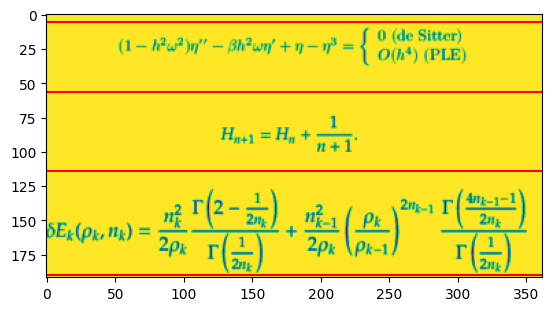

In [52]:
imt = multiline_utils.ImageTensor(sample[1].squeeze(0), th=0)
imt._find_blank_space()
s = imt._aggregate_vertical_indices()
lines = imt.split_img_into_lines()
s

plt.imshow(imt.arr)
# plot horiz lines at each s
for i in s:
    plt.axhline(i, color='r')
plt.show()

In [59]:
lines[0].squeeze(0).numpy().shape

(51, 362)

In [56]:
lines[0].numpy().shape

(1, 51, 362)

# Build test dataest

In [169]:
# ml_bleu_score, ml_edit_distance, ml_token_accuracy,\
#       ml_bleu_list, ml_edit_dists_list, ml_token_acc_list,\
#           ml_preds = perf_evaluation.evaluate_multiline(ml_model, ml_dataset_test, args)

res = perf_evaluation.evaluate_multiline(ml_model, ml_dataset_test, args, candidate_sizes=candidate_sizes)

  0%|          | 0/999 [00:00<?, ?it/s]

detected lines -->  1


BLEU: 0.037, ED: 1.65e+01, ACC: 0.002:   0%|          | 1/999 [00:17<4:49:11, 17.39s/it]

Len detok_dec -->  1
Len detok_dec @ index 0-->  501
Len runnig pred -->  501
Len of truth -->  1
detected lines -->  3
Len detok_dec -->  1
Len detok_dec @ index 0-->  512
Len runnig pred -->  512
Len detok_dec -->  1
Len detok_dec @ index 0-->  512
Len runnig pred -->  1024


BLEU: 0.046, ED: 9.10e+00, ACC: 0.016:   0%|          | 2/999 [00:54<8:01:44, 28.99s/it]

Len detok_dec -->  1
Len detok_dec @ index 0-->  378
Len runnig pred -->  1402
Len of truth -->  1
detected lines -->  3
Len detok_dec -->  1
Len detok_dec @ index 0-->  381
Len runnig pred -->  381


BLEU: 0.046, ED: 9.10e+00, ACC: 0.016:   0%|          | 2/999 [01:12<10:01:56, 36.23s/it]


KeyboardInterrupt: 